# CC VISHNU VARDHAN REDDY-20BCT0273 - ASSIGNMENT 3

In [1]:
import pandas as pd
data = pd.read_csv('housing.csv')

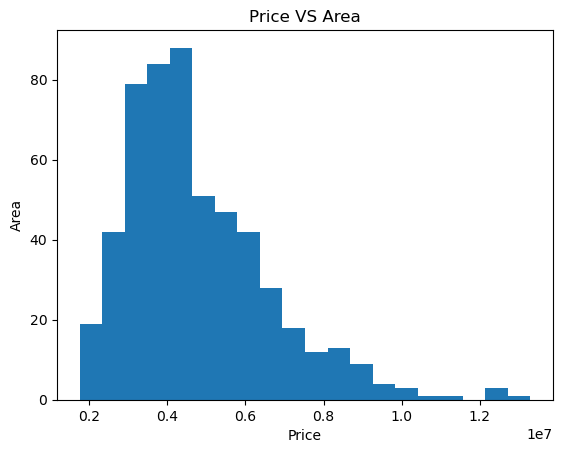

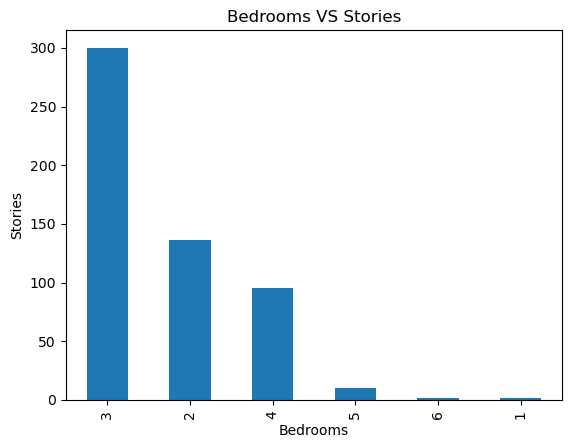

In [2]:
# Univariate analysis
import matplotlib.pyplot as plt

# Histogram  for price vs area
plt.hist(data['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Price VS Area')
plt.show()

# Bar plot for bedrooms vs stories
data['bedrooms'].value_counts().plot(kind='bar')
plt.xlabel('Bedrooms')
plt.ylabel('Stories')
plt.title('Bedrooms VS Stories')
plt.show()


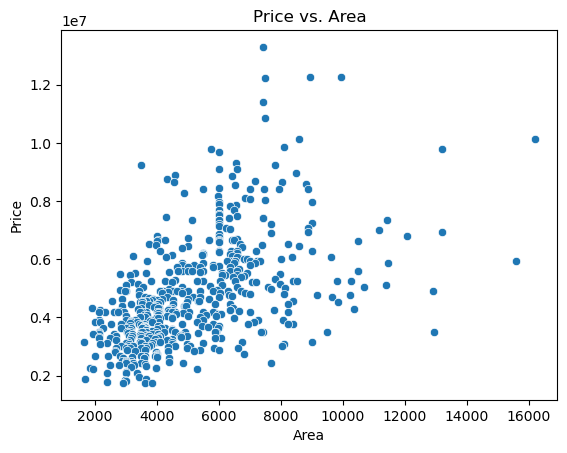

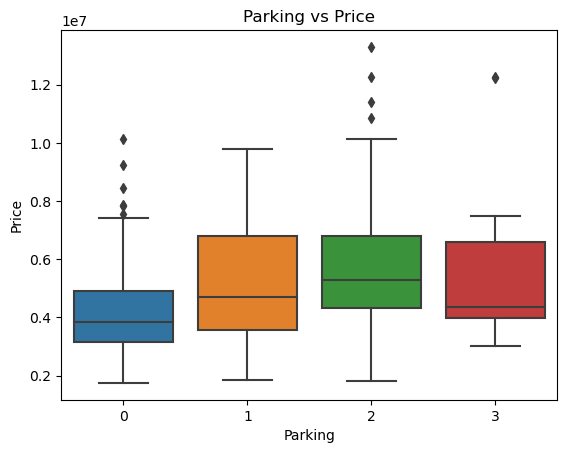

In [3]:
# Bivariate analysis
import seaborn as sns

# Scatter plot for area vs price
sns.scatterplot(x='area', y='price', data=data)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs. Area')
plt.show()

# Box plot for parking price
sns.boxplot(x='parking', y='price', data=data)
plt.xlabel('Parking')
plt.ylabel('Price')
plt.title('Parking vs Price')
plt.show()


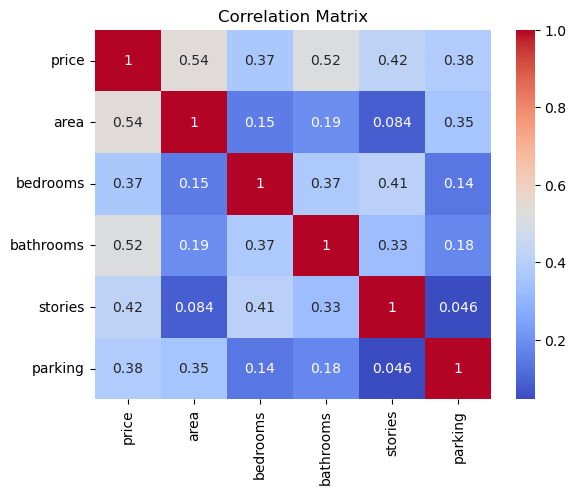

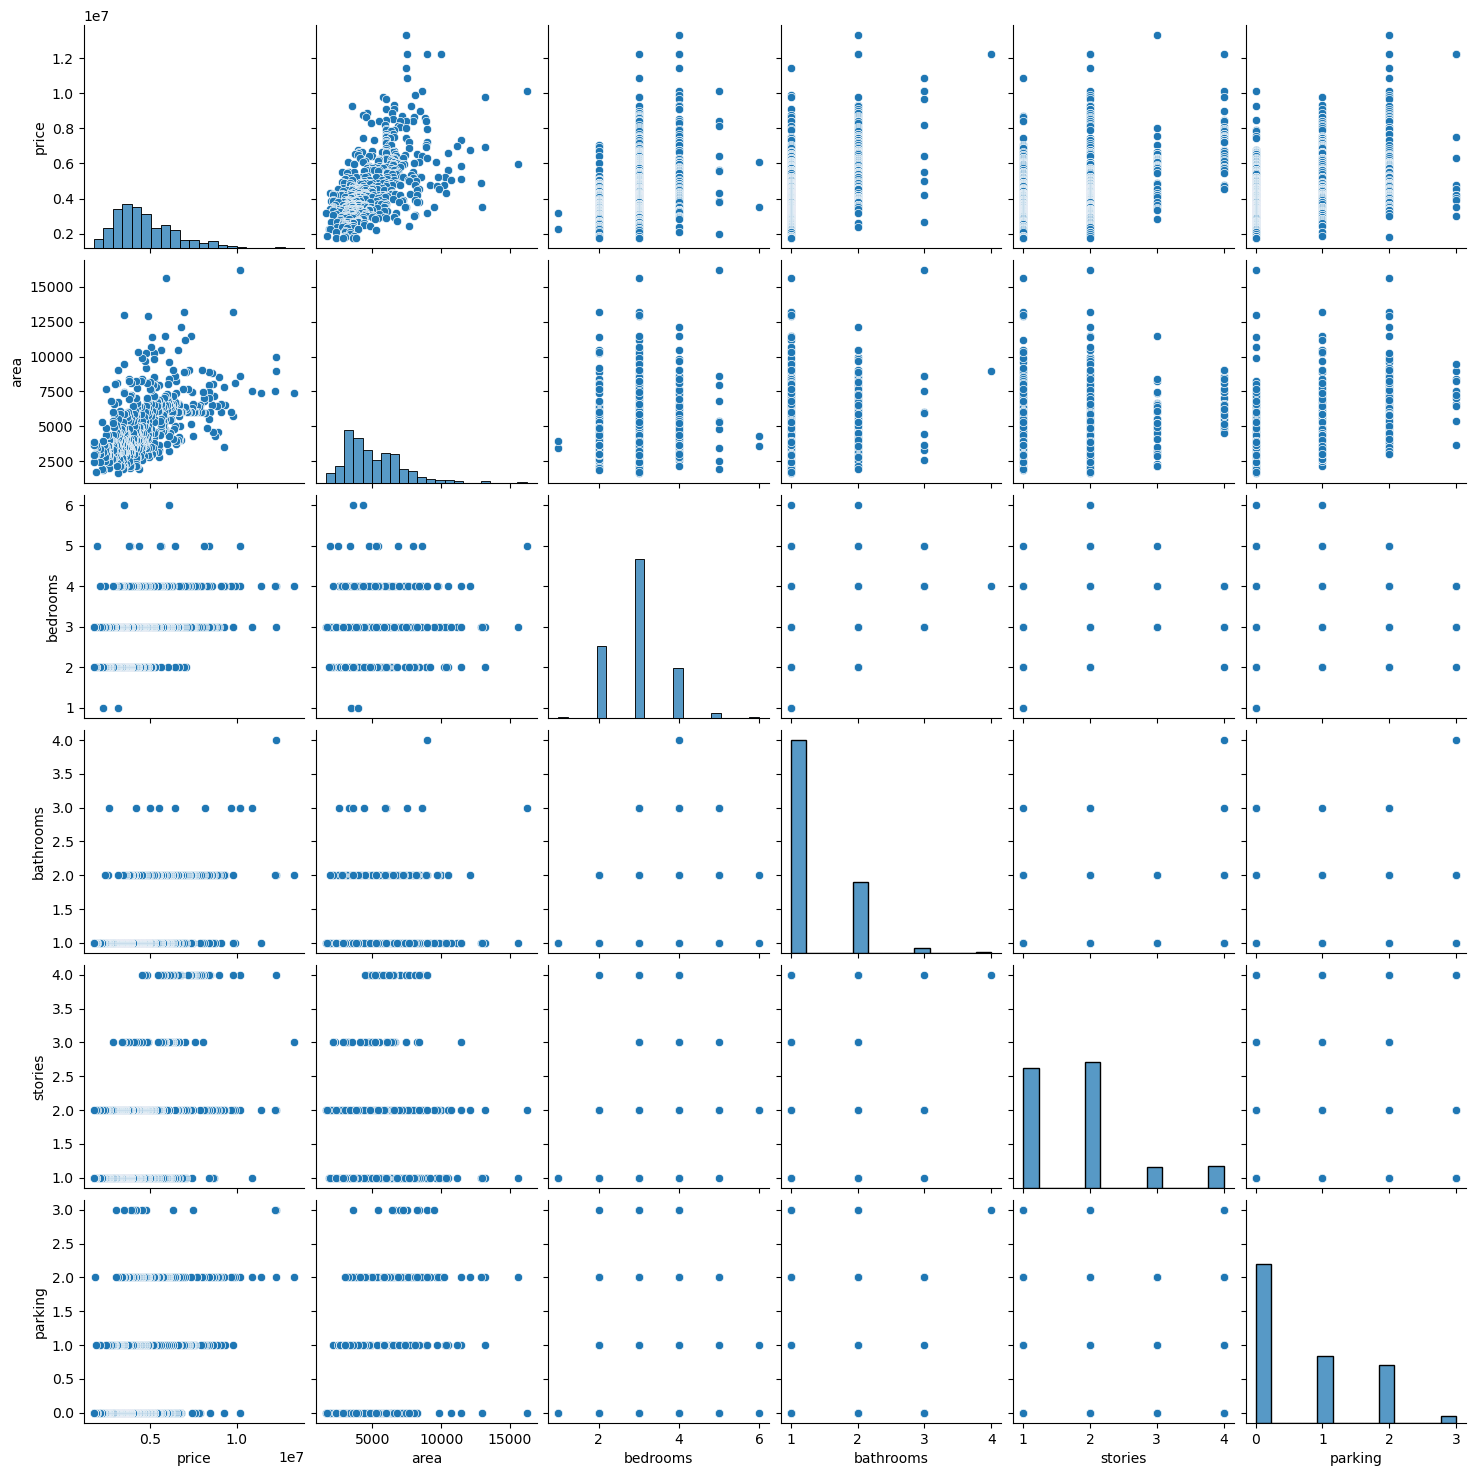

In [4]:
# Multivariate analysis

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


sns.pairplot(data)
plt.show()


In [5]:
statistics = data.describe()
print(statistics)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [6]:
# Missing values
missing_values = data.isnull().sum()
print(missing_values)
data = data.dropna()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [7]:
#Now we will be detecting outliers
import numpy as np
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = data[z_scores > threshold]
    return outliers
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms','stories','parking']
for column in numerical_columns:
    outliers = detect_outliers_zscore(data[column])
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in price:
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
5    10850000
Name: price, dtype: int64
Outliers in area:
7      16200
10     13200
66     13200
69     12090
125    15600
211    12900
403    12944
Name: area, dtype: int64
Outliers in bedrooms:
112    6
395    6
Name: bedrooms, dtype: int64
Outliers in bathrooms:
1      4
5      3
6      3
7      3
11     3
33     3
89     3
153    3
195    3
290    3
499    3
Name: bathrooms, dtype: int64
Outliers in stories:
Series([], Name: stories, dtype: int64)
Outliers in parking:
Series([], Name: parking, dtype: int64)


In [16]:
# Now we will replace outliers

def replace_outliers(data, column, method='median', threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = data[z_scores > threshold]
    
    if method == 'median':
        replacement_value = data[column].median()
    elif method == 'mean':
        replacement_value = data[column].mean()
    else:
        raise ValueError("Invalid replacement method. Choose 'median' or 'mean'.")
    
    data.loc[z_scores > threshold, column] = replacement_value
    
    return data

numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms','stories','parking']
for column in numerical_columns:
    data = replace_outliers(data, column, method='median')
data.to_csv('housing_without_outliers.csv', index=False)

In [17]:
# Checking for Categorical Columns
categorical_columns = data.select_dtypes(include=['object']).columns

# One-Hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)


In [18]:
# Spliting dependent and independent variables
X = data.drop('price', axis=1)  # X is Independent variables
y = data['price']  # Y is Dependent variable

In [19]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

ValueError: could not convert string to float: 'yes'

In [ ]:
# Spliting the data into testing and training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Building the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [ ]:
# Now we will Train the model
model.fit(X_train, y_train)


In [ ]:
# Now Testing the model
y_pred = model.predict(X_test)


In [ ]:
# Performance Measure

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)
